<a href="https://colab.research.google.com/github/Iveynganga/MACHINE-LEARNING-1/blob/main/BostonHousingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploratory Data analysis

In [3]:
# Load training data
train_data = pd.read_csv('/content/train.csv')

# Display the first few rows of the training data
print(train_data.head())

# Check the number of rows and columns of the training data
print(train_data.shape)

# Check the data types of each column
print(train_data.dtypes)

# Summary statistics of numerical columns
print(train_data.describe())

# Check for missing values in the training data
print(train_data.isnull().sum())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# Distribution

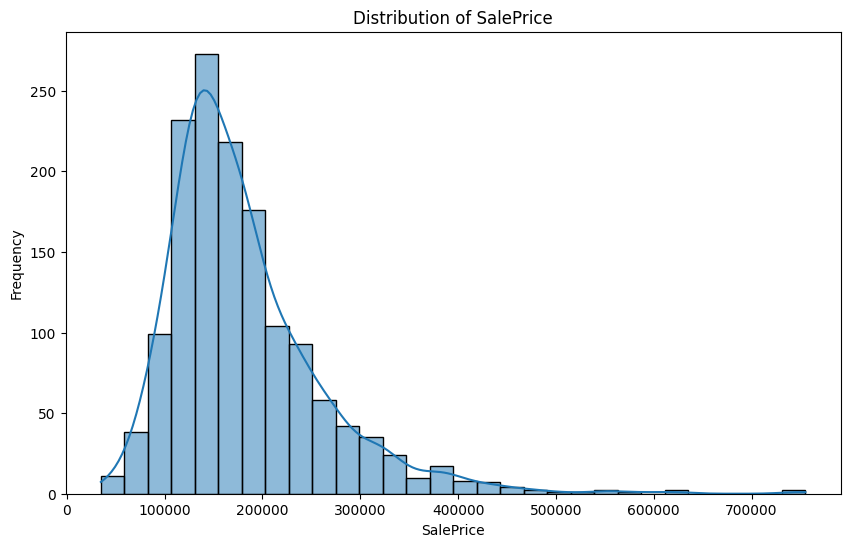

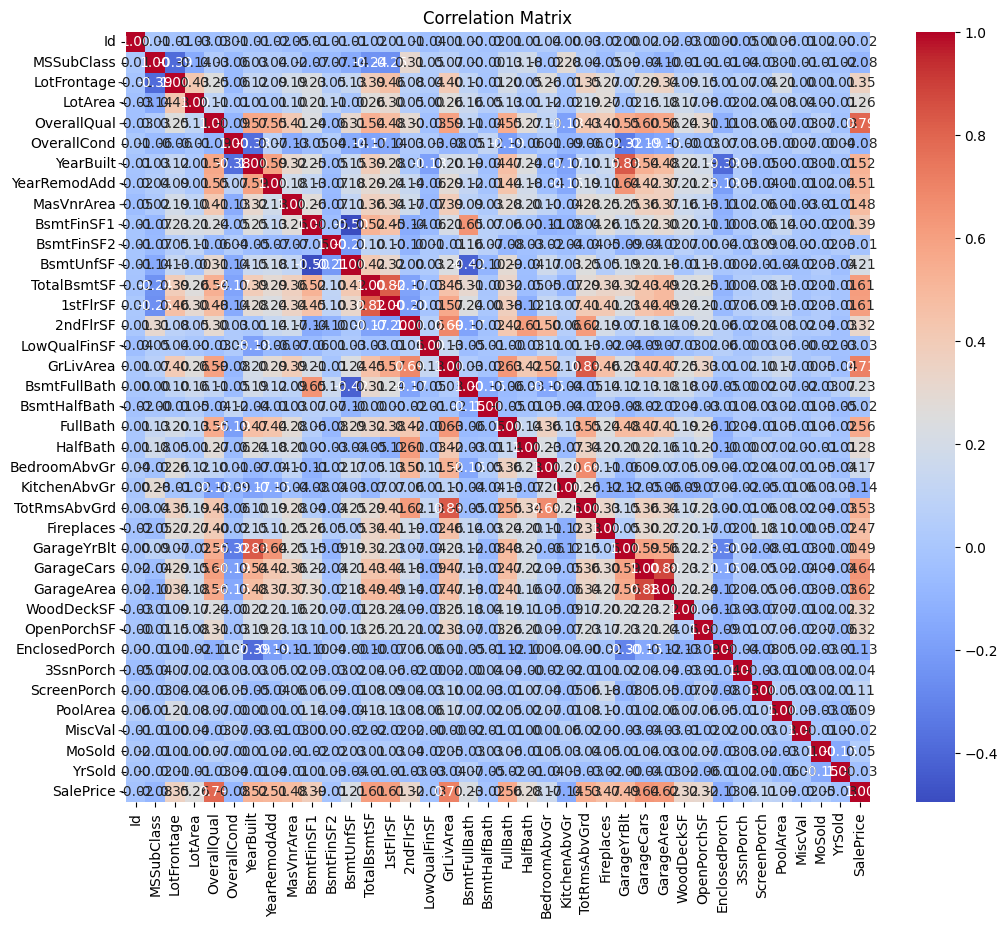

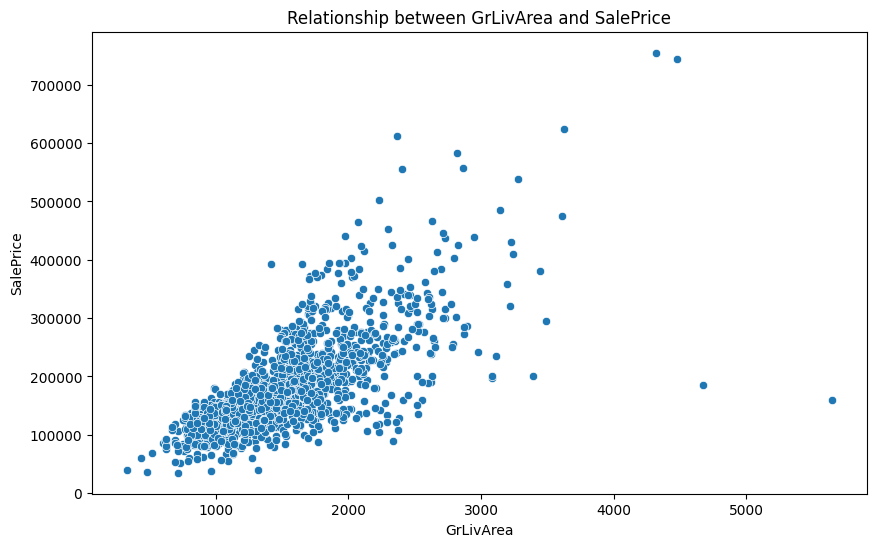

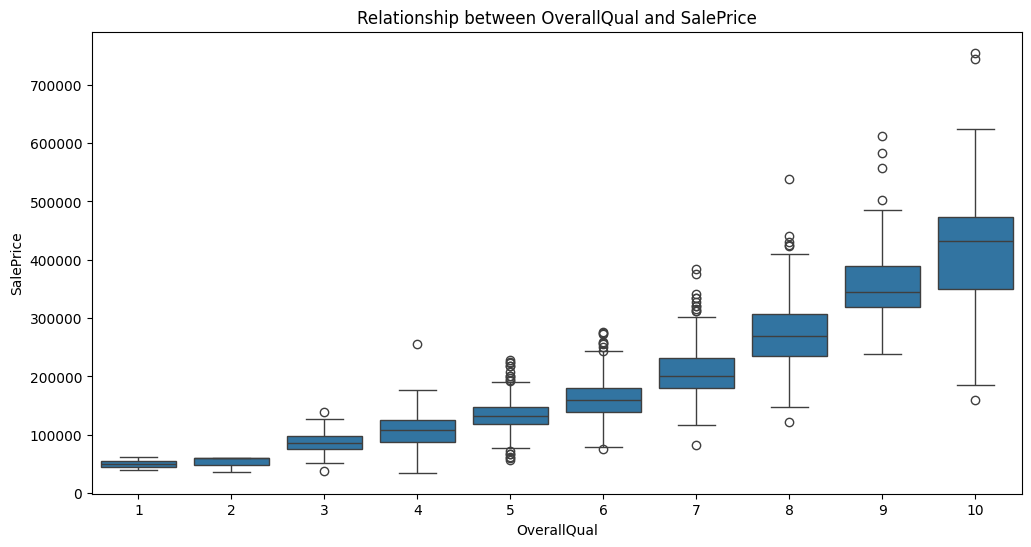

In [ ]:

# Visualize the distribution of the target variable (housing prices)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix to understand relationships between features and target
numeric_features = train_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_features.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Explore relationships between features and the target variable using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('Relationship between GrLivArea and SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Explore relationships between categorical variables and the target using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Relationship between OverallQual and SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Insights

1. The histogram is skewed to the right, which means most houses are priced lower with a few very high-priced houses.

2. GrLivArea has a high positive correlation with SalePrice, which means a larger area is associated with higher prices.

3. There are dense clusters of points which show where the most common living areas and sale prices are, indicating typical property characteristics in the dataset.

In [ ]:
# Load the test data
test_data = pd.read_csv('/content/test.csv')

# Display the first few rows of the test data
print(test_data.head())

# Check the number of rows and columns
print(test_data.shape)

# Check the data types of each column in the test data
print(test_data.dtypes)

# Summary statistics of numerical columns in the test data
print(test_data.describe())

# Check for missing values in the training data
print(test_data.isnull().sum())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

# 2. Data Cleaning, specifically, handling missingness in data

In [ ]:
train_data = pd.read_csv('/content/train.csv')

# Identify columns with missing values and their counts
missing_values = train_data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
train_data = pd.read_csv('/content/train.csv')

#Calculate the mean for each column
mean_values = {
    'LotFrontage': train_data['LotFrontage'].mean(),
    'MasVnrArea': train_data['MasVnrArea'].mean(),
    'GarageYrBlt': train_data['GarageYrBlt'].mean()
}

#Use fillna() function to replace missing values with mean values
train_data.fillna(value=mean_values, inplace=True)


In [ ]:
test_data = pd.read_csv('/content/test.csv')

# Handling missing values in the test data for LotFrontage column
test_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace=True)

# Handling missing values in the test data for SaleType column
test_data['SaleType'].fillna(train_data['SaleType'].mode()[0], inplace=True)

print(test_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

# Encoding

In [ ]:
# one-hot encoding for test data
test_data = pd.read_csv('/content/test.csv')

test_data_encoded = pd.get_dummies(test_data, columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])

print(test_data.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [ ]:
# one-hot encoding for train data

train_data = pd.read_csv('/content/train.csv')

train_data_encoded = pd.get_dummies(train_data, columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])

print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

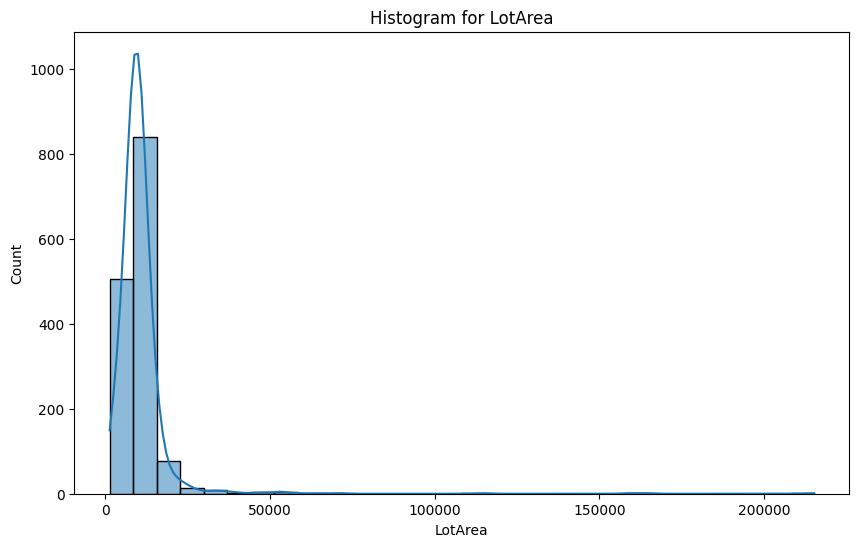

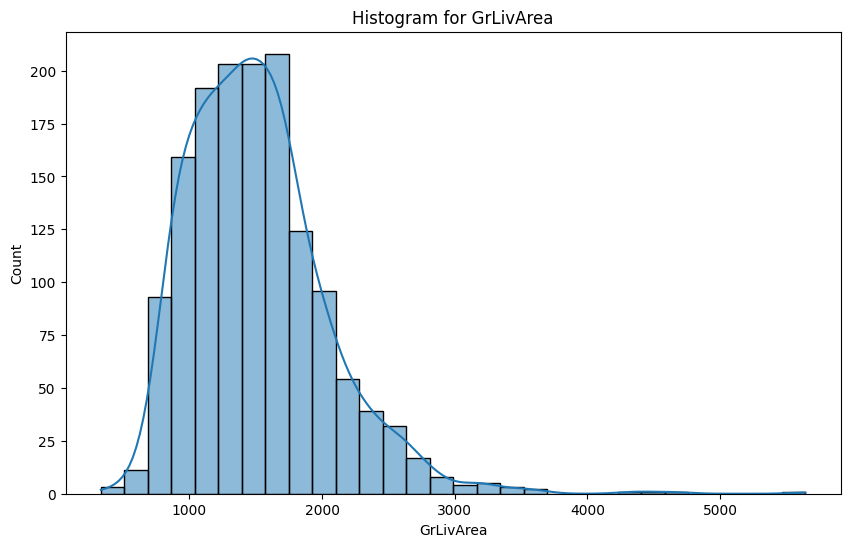

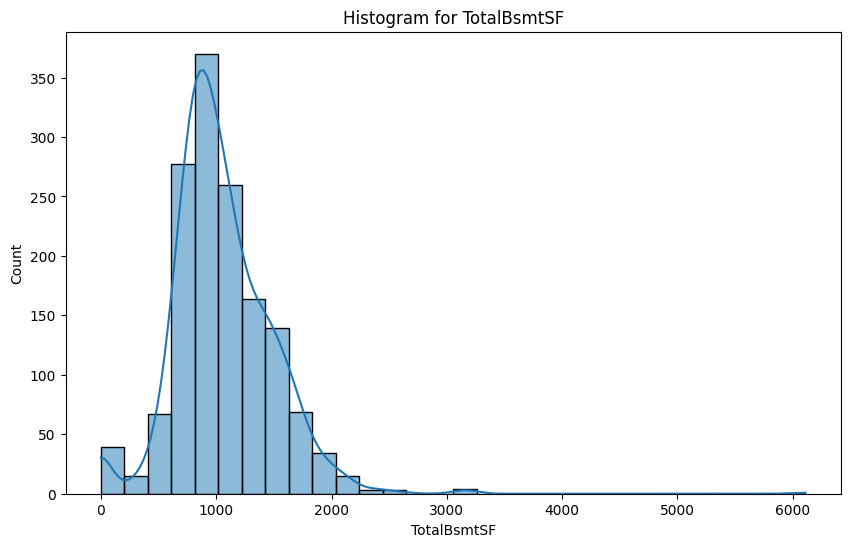

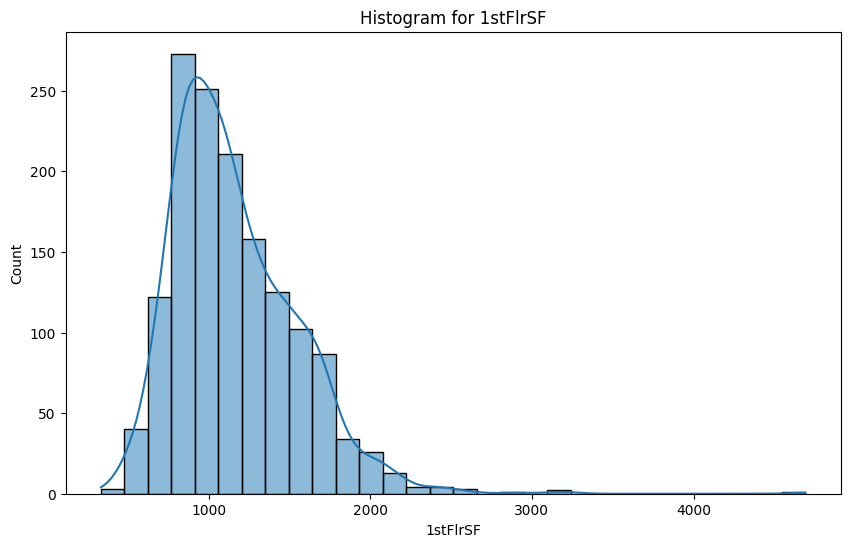

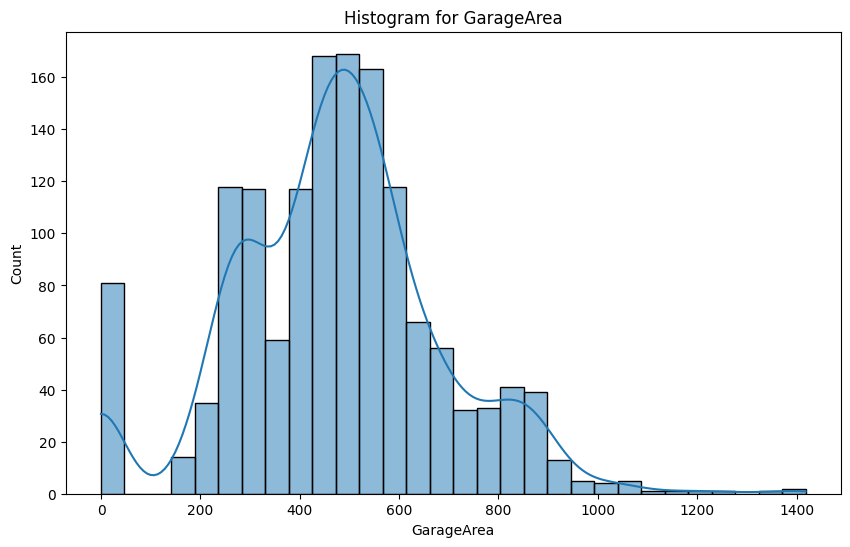

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
53      54          20       RL         68.0    50271   Pave   NaN      IR1   
66      67          20       RL          NaN    19900   Pave   NaN      Reg   
70      71          20       RL         95.0    13651   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1396  1397          20       RL          NaN    57200   Pave   NaN      IR1   
1404  1405          50       RL         60.0    10410   Pave  Grvl      Reg   
1417  1418          60       RL          NaN    16545   Pave   NaN      IR1   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [6]:
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Visualize histograms for numerical features
numerical_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[feature], bins=30, kde=True)
    plt.title(f'Histogram for {feature}')
    plt.show()

# Identify outliers based on manual thresholds (Example)
lot_area_threshold = 20000
grliv_area_threshold = 3000
total_bsmt_sf_threshold = 2000
first_flr_sf_threshold = 2000
garage_area_threshold = 1000

outliers_lot_area = train_data[train_data['LotArea'] > lot_area_threshold]
outliers_grliv_area = train_data[train_data['GrLivArea'] > grliv_area_threshold]
outliers_total_bsmt_sf = train_data[train_data['TotalBsmtSF'] > total_bsmt_sf_threshold]
outliers_first_flr_sf = train_data[train_data['1stFlrSF'] > first_flr_sf_threshold]
outliers_garage_area = train_data[train_data['GarageArea'] > garage_area_threshold]

# Model-based outlier detection using Isolation Forest
isolation_forest = IsolationForest(contamination=0.1)
features_to_consider = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']
isolation_forest.fit(train_data[features_to_consider])

# Predict outliers
outliers_indices = isolation_forest.predict(train_data[features_to_consider])

# Filter outliers
outliers = train_data.iloc[outliers_indices == -1]

# Manual inspection of outliers
print(outliers)

4. Feature Selection - PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select numerical features for PCA excluding the target variable
numeric_features = train_data.select_dtypes(include=np.number)
X = numeric_features.drop(columns=['SalePrice'])
y = train_data['SalePrice']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Apply PCA and initialize PCA without specifying the number of components
pca = PCA()
X_pca = pca.fit_transform(X_imputed)

# Calculate the number of components to retain 95% of variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_imputed)

# Display the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Number of selected principal components
print("Number of selected principal components:", pca.n_components_)

# Transform test data using the same PCA object
X_test_scaled = scaler.transform(test_data[X.columns])
X_test_imputed = imputer.transform(X_test_scaled)
X_test_pca = pca.transform(X_test_imputed)

Explained variance ratio: [0.19257704 0.0870875  0.06863335 0.05483787 0.04018977 0.03240838
 0.03140828 0.03082322 0.02983722 0.02951695 0.02916653 0.02805759
 0.02756369 0.027202   0.02596612 0.0245406  0.02363989 0.02242711
 0.0220884  0.02128027 0.02000785 0.01815055 0.01688501 0.01588458
 0.01376819 0.01102334 0.01051606]
Number of selected principal components: 27


5. Regression models

In [ ]:
# Load the dataset
train_data = pd.read_csv("/content/train.csv")

# Select categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
data_encoded = pd.get_dummies(train_data, columns=categorical_cols)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...           False         False   
1          1976         0.0         978  ...           False         False   
2          2002       162.0         486  ...           False         False   
3          1970         0.0         216  ...           False         False   
4          2000       350.0         655  ...           False         False   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Model Evaluation
y_pred = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4272643295.677447


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Assuming train_data is your DataFrame with the dataset
train_data = pd.read_csv('/content/train.csv')

# Separate features and target variable
X = train_data.drop(columns=['SalePrice'])  # Replace 'SalePrice' with your target variable name
y = train_data['SalePrice']

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with the Ridge model in a pipeline
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('ridge', Ridge(alpha=1.0))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
ridge_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = ridge_pipeline.predict(X_train)
y_pred_test = ridge_pipeline.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Training MSE: 449600054.9107463
Test MSE: 884711147.5596393


In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
train_data = pd.read_csv('/content/train.csv')

# Separate features and target variable
X = train_data.drop(columns=['SalePrice'])  # Replace 'Target' with your target variable name
y = train_data['SalePrice']

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing with the Logistic Regression model in a pipeline
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('logistic', LogisticRegression(max_iter=1000))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
logistic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = logistic_pipeline.predict(X_train)
y_pred_test = logistic_pipeline.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_test)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_test, zero_division=1)}')


Training Accuracy: 0.997431506849315
Test Accuracy: 0.0136986301369863
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Classification Report:
               precision    recall  f1-score   support

       35311       1.00      0.00      0.00         1
       40000       1.00      0.00      0.00         1
       55000       0.00      1.00      0.00         0
       55993       1.00      0.00      0.00         1
       60000       1.00      0.00      0.00         1
       64500       1.00      0.00      0.00         1
       66500       1.00      0.00      0.00         1
       67000       1.00      0.00      0.00         2
       68400       1.00      0.00      0.00         1
       68500       1.00      0.00      0.00         1
       75000       1.00      0.00      0.00         1
       75500       1.00      0.00      0.00         1
       78000       0.00      1.00      0.00         0
       79

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
train_data = pd.read_csv('/content/train.csv')

# Define the feature columns and target variable
feature_columns = [
    'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenQual', 'GarageArea', 'Fireplaces', 'Neighborhood'
]
target_column = 'SalePrice'

# Separate features and target variable
X = train_data[feature_columns]
y = train_data[target_column]

# Preprocessing for categorical data and scaling
categorical_features = ['KitchenQual', 'Neighborhood']
numerical_features = list(set(feature_columns) - set(categorical_features))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create a pipeline that generates polynomial features and then applies linear regression
degree = 2
model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=degree)),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R^2: {train_r2}')
print(f'Test R^2: {test_r2}')


Training RMSE: 14418.425426166545
Test RMSE: 53814468439187.92
Training R^2: 0.9651455719990205
Test R^2: -3.7755852035064595e+17
